# **Installing Libraries**


In [25]:
!pip install opencv-python opencv-python-headless torch torchvision matplotlib librosa


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at e:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [26]:
import cv2
import matplotlib.pyplot as plt

# Load the Haar Cascade file for animal detection
cascade_path = 'C:/Users/abbas/Desktop/Work/haarcascade_frontalcatface.xml'
animal_cascade = cv2.CascadeClassifier(cascade_path)


# **Haar Feature Detection**

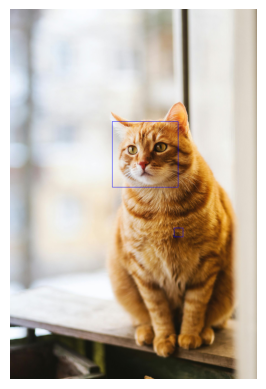

In [27]:
def detect_animals(image_path):
    # Check if the classifier loaded properly
    if animal_cascade.empty():
        print("Error loading Haar Cascade classifier. Check the file path.")
        return
    
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Could not read the image. Check the image path.")
        return

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect animals (cats) in the image
    animals = animal_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles around detected animals
    for (x, y, w, h) in animals:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the image with detected animals
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
detect_animals('Animal.jpg')


In [28]:
import cv2

def detect_animals_in_video(video_path):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        animals = animal_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in animals:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        cv2.imshow('Animal Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage
detect_animals_in_video('Video1.mp4')


KeyboardInterrupt: 

# **Installing Packages**

In [ ]:
import requests

# URLs of the files to download
urls = [
    ("https://pjreddie.com/media/files/yolov3.weights", "yolov3.weights"),
    ("https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg", "yolov3.cfg"),
    ("https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names", "coco.names")
]

# Download each file
for url, filename in urls:
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download {filename}")


Downloaded yolov3.weights
Downloaded yolov3.cfg
Downloaded coco.names


# **YOLO**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLOv3 network
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

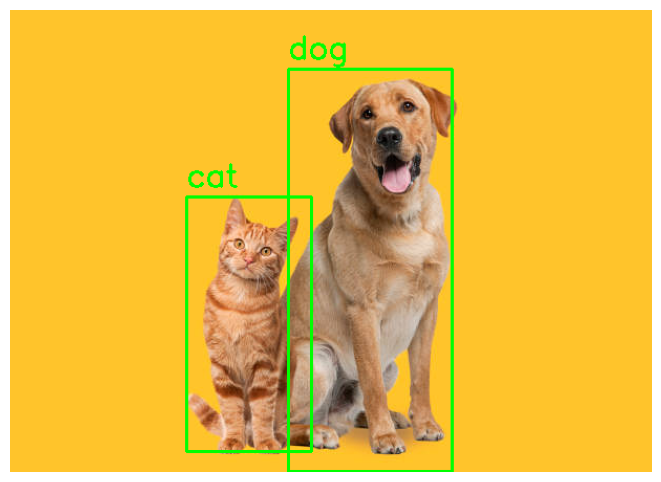

In [2]:
def detect_objects_yolo(image_path):
    image = cv2.imread(image_path)
    height, width, channels = image.shape

    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = (0, 255, 0)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Convert image from BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display image using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Example usage
detect_objects_yolo('Dog-Cat.jpg')

In [2]:
import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

def detect_objects_yolo_video(video_path):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        height, width, channels = frame.shape

        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)

        class_ids = []
        confidences = []
        boxes = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                color = (0, 255, 0)
                cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
                cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

        cv2.imshow('Object Detection', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage
detect_objects_yolo_video('Animals2.mp4')


# Sound Analysis

In [ ]:
!pip install librosa
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable

DEPRECATION: Loading egg at e:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330



Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at e:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
import numpy as np

# Mock dataset
# Suppose we have 10 audio samples with MFCC features and labels
# Replace this with your actual dataset
X = np.random.rand(10, 13)  # 10 samples, each with 13 MFCC features
y = np.random.choice(['Angry', 'Normal'], 10)  # 10 labels

print("Dataset X shape:", X.shape)
print("Labels y shape:", y.shape)



Dataset X shape: (10, 13)
Labels y shape: (10,)


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Example SVM classifier pipeline
svm_classifier = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC(kernel='linear'))  # SVM classifier
])

# Train the classifier
svm_classifier.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

# Extracting audio from video

In [ ]:
!pip install moviepy

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at e:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [38]:
from moviepy.editor import VideoFileClip

def convert_video_to_audio(video_path, audio_path):
    video_clip = VideoFileClip(video_path)
    audio_clip = video_clip.audio
    audio_clip.write_audiofile(audio_path)
    audio_clip.close()
    video_clip.close()

# Example usage
convert_video_to_audio('Angry-Dog1.mp4', 'extracted_audio.wav')


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


In [40]:
import numpy as np
import librosa
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to extract MFCC features from audio file
def extract_mfcc(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Dummy data for demonstration (replace with your actual dataset)
# Example: Assuming X_train contains MFCC features and y_train contains mood labels
X_train = np.random.rand(100, 13)  # Replace with your actual features
y_train = np.random.choice(['angry', 'normal'], size=100)  # Replace with your actual labels

# Example SVM classifier initialization
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Example of extracting MFCC features from an audio file
audio_file = 'extracted_audio.wav'
audio_features = extract_mfcc(audio_file)

# Predict the mood using the trained SVM classifier
predicted_mood = svm_classifier.predict([audio_features])[0]

# Print predicted mood
print("Predicted Mood:", predicted_mood)


Predicted Mood: angry


# Sound Analysis Working

In [42]:
import cv2
import numpy as np
import librosa
from sklearn.svm import SVC
from sklearn.exceptions import NotFittedError
from sklearn.utils.validation import check_is_fitted

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Function to extract MFCC features from audio file
def extract_mfcc(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Example SVM classifier initialization
svm_classifier = SVC(kernel='linear')

# Function to perform YOLO detection on a frame
def detect_objects_yolo(frame):
    height, width, channels = frame.shape

    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = (0, 255, 0)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    return frame

# Function to detect objects and overlay mood on video
def detect_objects_and_mood(video_path, audio_path):
    cap = cv2.VideoCapture(video_path)
    audio_features = extract_mfcc(audio_path)

    # Check if SVM classifier is fitted
    try:
        check_is_fitted(svm_classifier)
    except NotFittedError:
        # Fit SVM classifier with dummy data if not fitted
        X_train = np.random.rand(100, 13)  # Replace with your actual features
        y_train = np.random.choice(['angry', 'normal'], size=100)  # Replace with your actual labels
        svm_classifier.fit(X_train, y_train)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = detect_objects_yolo(frame)
        try:
            predicted_mood = svm_classifier.predict([audio_features])[0]
        except NotFittedError:
            print("SVM classifier is not fitted. Please fit the classifier before prediction.")
            break
        cv2.putText(frame, f"Mood: {predicted_mood}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Object Detection and Mood Overlay', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage
detect_objects_and_mood('Angry-Dog1.mp4', 'extracted_audio.wav')


KeyboardInterrupt: 

# Graph Based Movement Tracking

In [43]:
import cv2
import numpy as np
import math
import librosa
import random

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [44]:
# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [45]:
# Graph implementation using adjacency list
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        self.graph[u].append(v)
        self.graph[v].append(u)

    def bfs(self, start):
        visited = set()
        queue = [start]
        visited.add(start)

        while queue:
            vertex = queue.pop(0)
            print(vertex, end=" ")

            for neighbor in self.graph[vertex]:
                if neighbor not in visited:
                    queue.append(neighbor)
                    visited.add(neighbor)
        print()

    def dfs(self, start, visited=None):
        if visited is None:
            visited = set()
        visited.add(start)
        print(start, end=" ")

        for neighbor in self.graph[start]:
            if neighbor not in visited:
                self.dfs(neighbor, visited)
        print()

In [46]:

def get_animal_positions(frame, net, output_layers, classes):
    height, width, _ = frame.shape
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    positions = []
    max_confidence = 0
    best_detection = None
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                if confidence > max_confidence:
                    max_confidence = confidence
                    best_detection = (center_x, center_y, w, h, classes[class_id])
                positions.append((center_x, center_y, w, h, classes[class_id], confidence))
    return positions, best_detection

In [47]:

def update_graph_with_movements(graph, prev_positions, curr_positions, threshold_distance=50):
    for i, (px, py, _, _, _, _) in enumerate(prev_positions):
        for j, (cx, cy, _, _, _, _) in enumerate(curr_positions):
            distance = math.sqrt((px - cx)**2 + (py - cy)**2)
            if distance < threshold_distance:  # Define a suitable threshold distance
                graph.add_edge(i, j)

In [48]:

def extract_features(audio_path):
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

def classify_sound(mfcc_features):
    return random.choice(["Angry", "Normal"])

In [49]:

def track_animal_movements(video_path, audio_path, net, output_layers, classes):
    cap = cv2.VideoCapture(video_path)
    graph = Graph()
    prev_positions = []

    mfcc_features = extract_features(audio_path)
    animal_mood = classify_sound(mfcc_features)
    print(f"Animal Mood: {animal_mood}")

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        curr_positions, best_detection = get_animal_positions(frame, net, output_layers, classes)

        if prev_positions:
            update_graph_with_movements(graph, prev_positions, curr_positions)

        # Draw the best YOLO detection box
        if best_detection:
            center_x, center_y, w, h, label = best_detection
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, f"{label}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Draw movement tracking dots
        for (center_x, center_y, _, _, _, _) in curr_positions:
            cv2.circle(frame, (center_x, center_y), 5, (0, 0, 255), -1)

        # Display animal mood in a fixed position
        cv2.putText(frame, f"Mood: {animal_mood}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        cv2.imshow("Wildlife Monitoring System", frame)
        cv2.resizeWindow("Wildlife Monitoring System", frame.shape[1], frame.shape[0])  # Adjust window size to the frame's dimensions
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        prev_positions = curr_positions

    cap.release()
    cv2.destroyAllWindows()

    if prev_positions:
        print("BFS Traversal:")
        graph.bfs(0)
        print("DFS Traversal:")
        graph.dfs(0)

# Example usage
track_animal_movements('Angry-Dog1.mp4', 'extracted_audio.wav', net, output_layers, classes)

Animal Mood: Angry
BFS Traversal:
0 1 3 4 2 5 6 7 8 
DFS Traversal:
0 1 2 3 4 5 6 7 
8 







